# Import Libray

In [1]:
# 1️⃣ Impor Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, ConfusionMatrixDisplay
from google.colab import drive

Mengimpor library yang dibutuhkan untuk pengembangan proyek ini seperti manipulasi data (pandas, numpy),visualisasi (seaborn, matplotlib), machine learning (sklearn)

# Data Loading

Pada tahap, kita akan mengambil memanggil dataset yang telah di upload pada Google Drive



In [2]:
#akses drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/DBS/Submission_TerapanPertama/StudentsPerformance.csv")

Selanjutnya, kita melihat isi dari dataset secara sekilas dengan .head() dan ukuran dari dataset dengan .shape

In [5]:
print(df.shape)
df.head(100)

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82
96,male,group B,some high school,standard,completed,65,66,62
97,female,group E,some college,standard,completed,63,72,70
98,female,group D,some college,free/reduced,none,58,67,62


Menampilkan Informasi jumlah baris dan kolom

In [6]:
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (1000, 8)


melihat statistik deskriptif dari seluruh kolom dalam DataFrame (baik numerik maupun kategorikal), berikut ini

In [15]:
print(df.describe(include='all'))

        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  
count                     1000  1000.00000    1000.000000    1000.000000

# Exploratory Data Analysis

Selanjutnya, kita akan menampilkan informasi dataset siswa



In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race/ethnicity               1000 non-null   int64  
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average_score                1000 non-null   float64
 9   prestasi                     1000 non-null   int64  
 10  total_score                  1000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 86.1 KB


**Menangani Missing Value**

Pada tahap ini kita akan mengecek data yang tidak valid pada dataset

In [11]:
pd.DataFrame({'Jumlah missing valueg':df.isna().sum()})

,Jumlah missing valueg
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Dari hasil yang ditampilkan, data tidak memiliki nilai kosong (null) pada setiap kolom dataset



**Menangani Dupliaksi**

In [13]:
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


Hasil yang ditampilkan adalah 0, dengan demikian data tidak ada yang ganda (dupikat)



**Univariate Analysis**

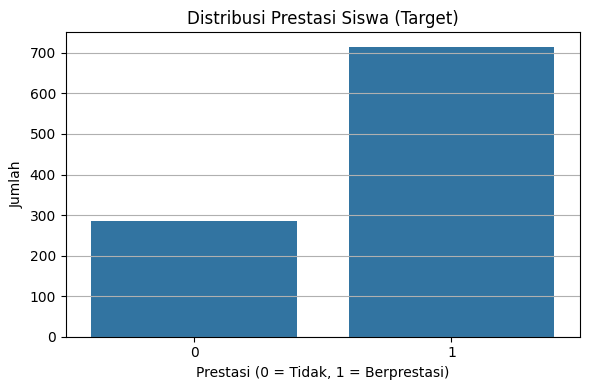

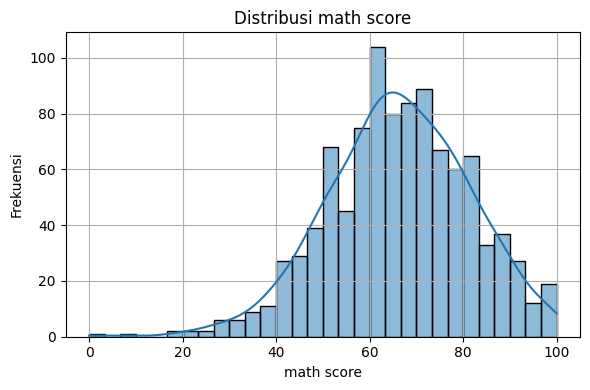

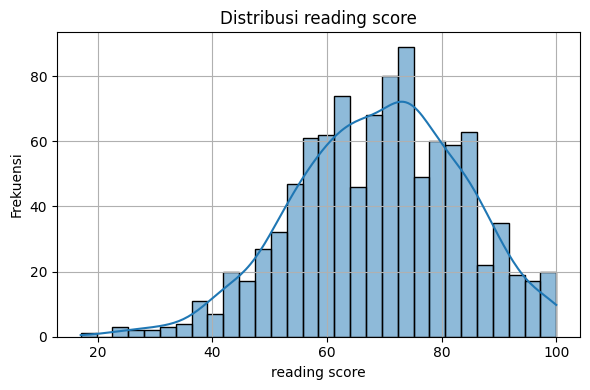

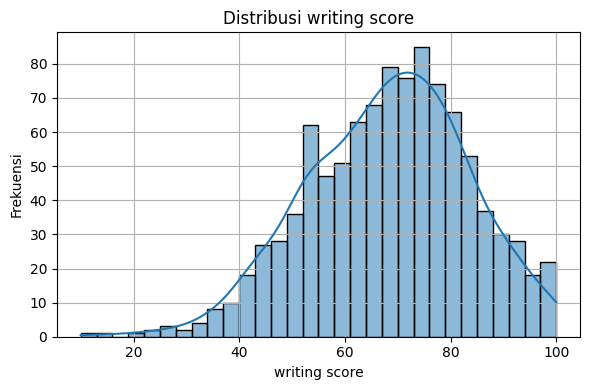

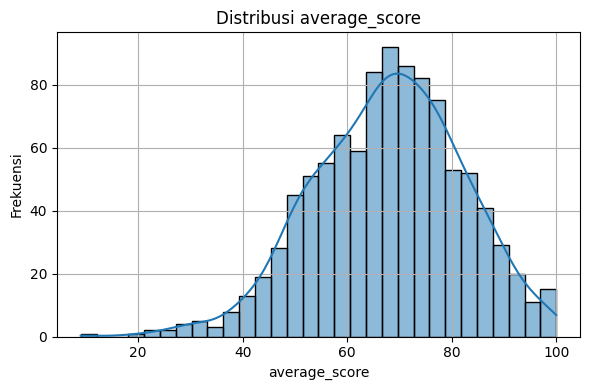

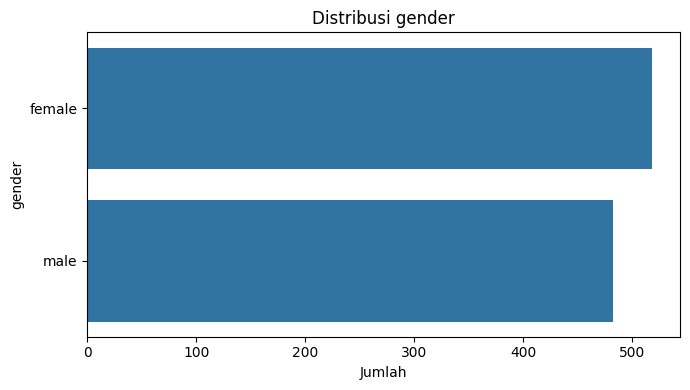

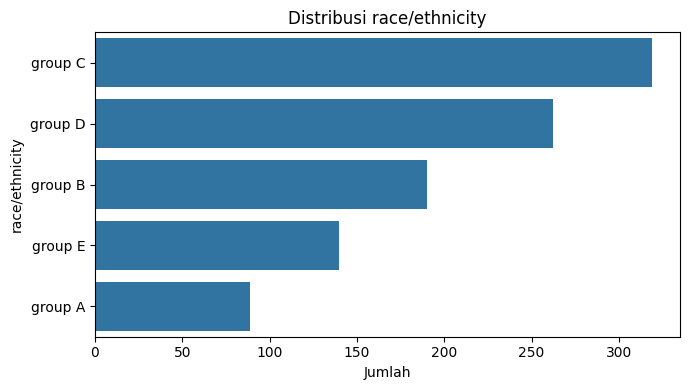

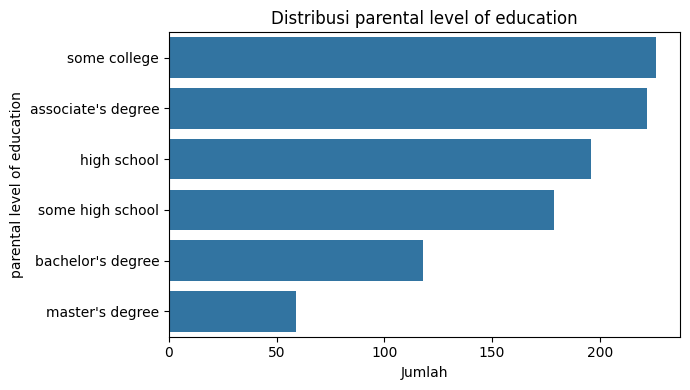

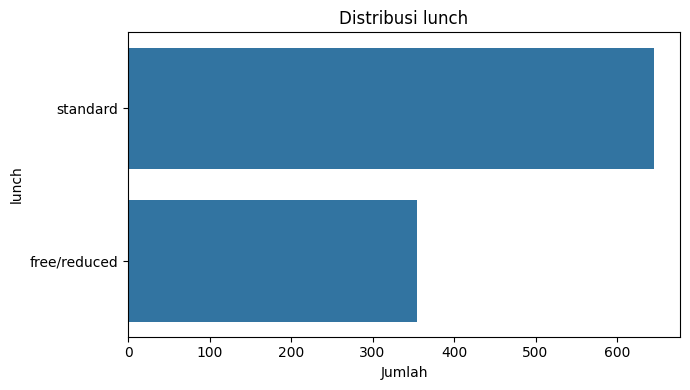

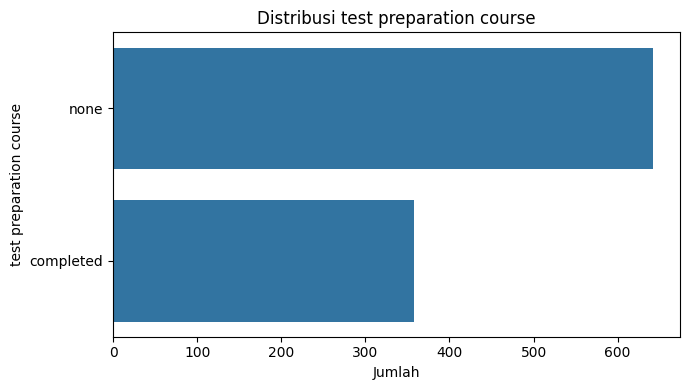

In [20]:
# Pisahkan kolom numerik dan kategorikal
num_cols = ['math score', 'reading score', 'writing score', 'average_score'] # Removed 'total_score'
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Visualisasi distribusi target 'prestasi'
plt.figure(figsize=(6, 4))
sns.countplot(x='prestasi', data=df)
plt.title('Distribusi Prestasi Siswa (Target)')
plt.xlabel('Prestasi (0 = Tidak, 1 = Berprestasi)')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Distribusi fitur numerik
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Distribusi fitur kategorikal
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xlabel('Jumlah')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

**Multivariate Analysis**

Pada bagian ini, akan ditunjukan hubungan antara dua variabel biasa disebut sebagai bivariate EDA. Selanjutnya, kita akan melakukan analisis data pada fitur kategori dan numerik

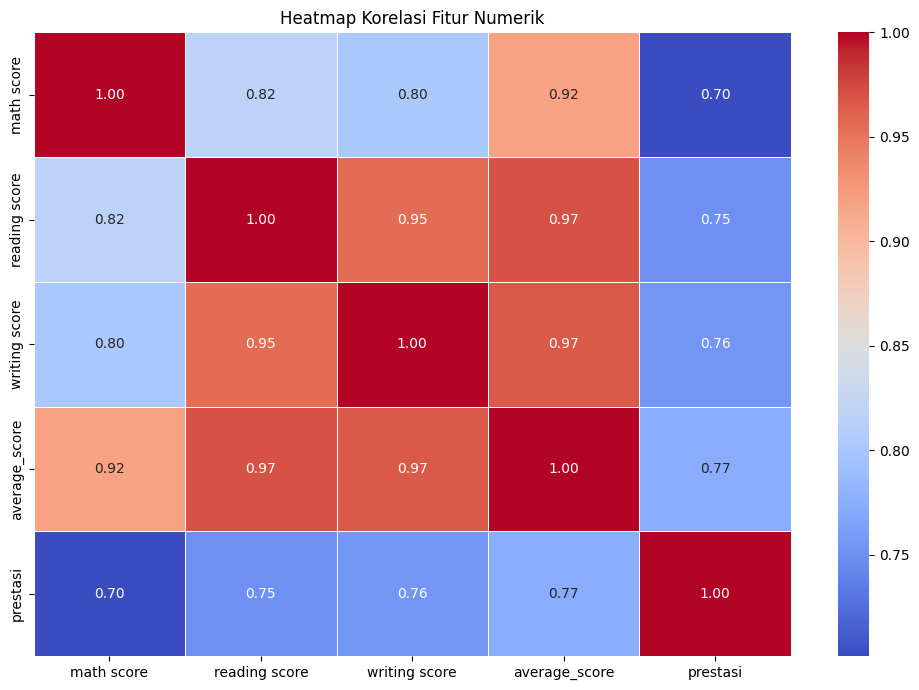

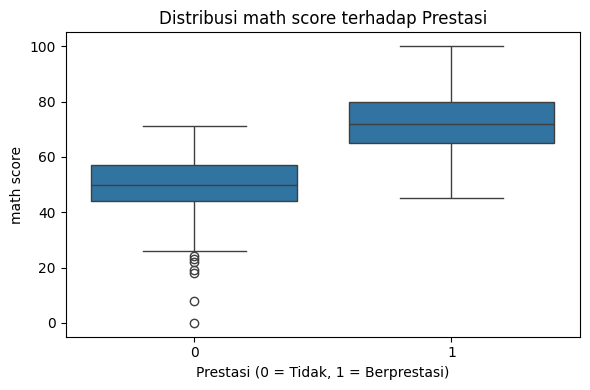

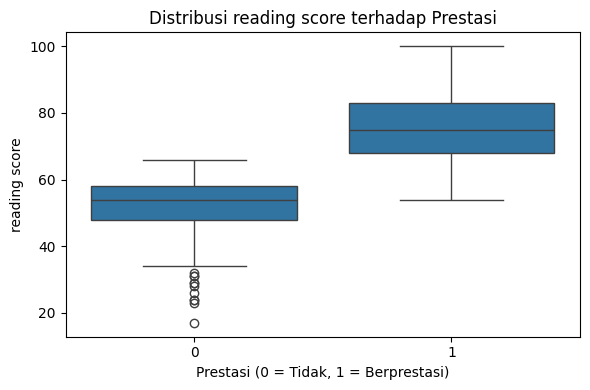

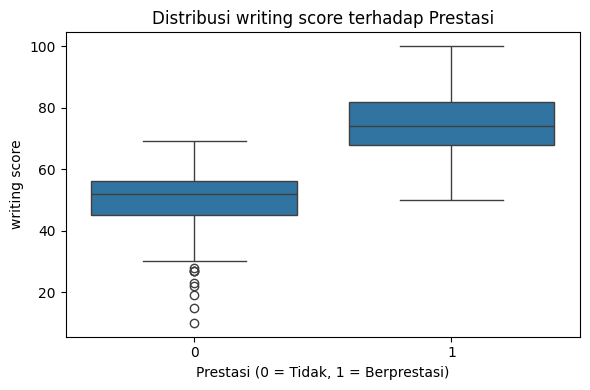

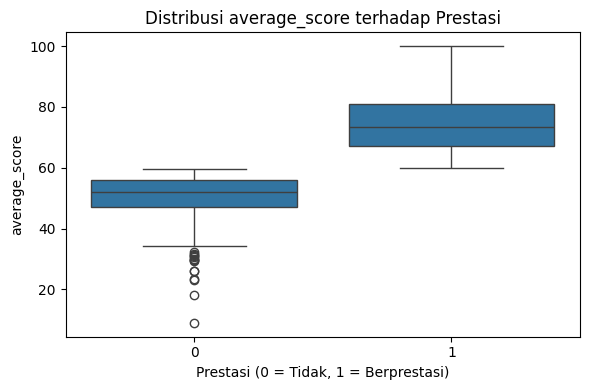

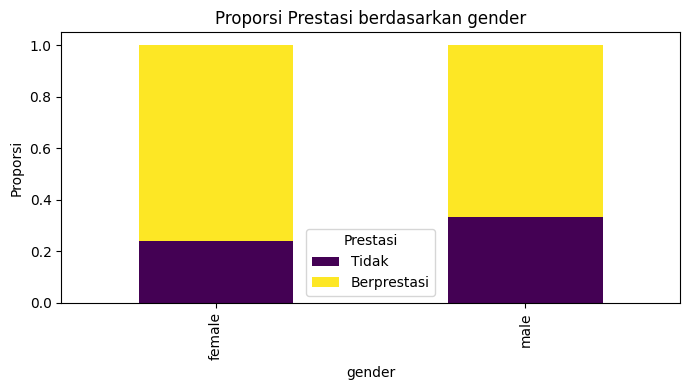

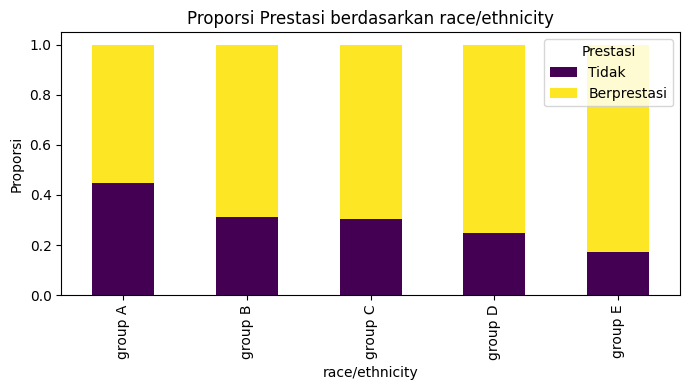

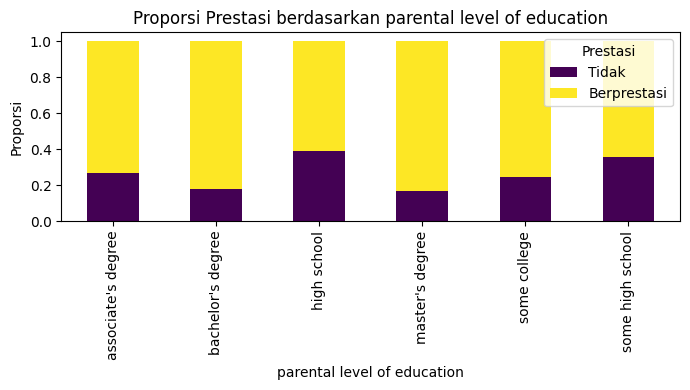

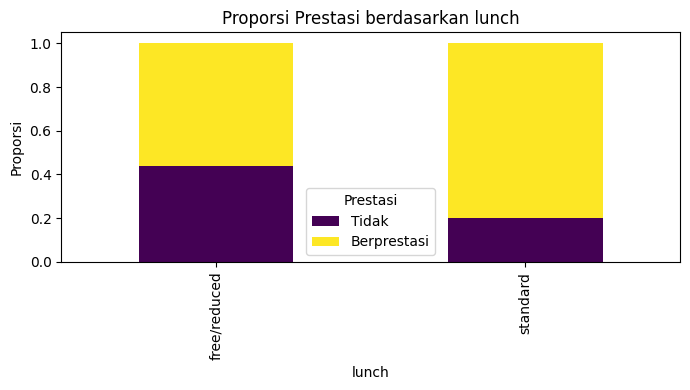

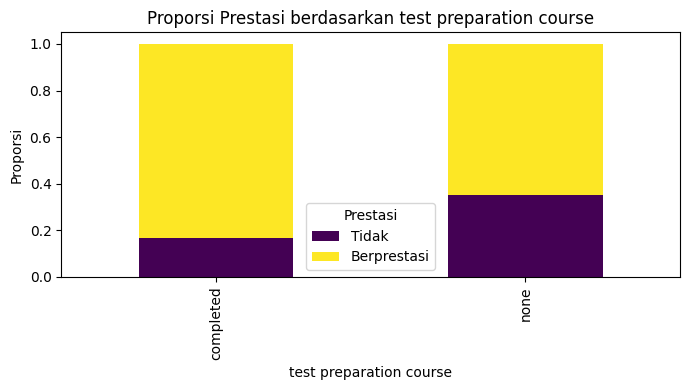

In [23]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10, 7))
corr_matrix = df[num_cols + ['prestasi']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

# Boxplot nilai numerik terhadap label prestasi
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='prestasi', y=col, data=df)
    plt.title(f'Distribusi {col} terhadap Prestasi')
    plt.xlabel('Prestasi (0 = Tidak, 1 = Berprestasi)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Proporsi prestasi berdasarkan fitur kategorikal
for col in cat_cols:
    cross_tab = pd.crosstab(df[col], df['prestasi'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(7, 4), colormap='viridis')
    plt.title(f'Proporsi Prestasi berdasarkan {col}')
    plt.xlabel(col)
    plt.ylabel('Proporsi')
    plt.legend(title='Prestasi', labels=['Tidak', 'Berprestasi'])
    plt.tight_layout()
    plt.show()


# PREPROCESSING & ENCODING

In [24]:
df["average_score"] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df["prestasi"] = df["average_score"].apply(lambda x: 1 if x >= 70 else 0)
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

In [25]:
# Encoding kolom kategorikal
label_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

- Menambahkan kolom rata-rata dan total skor
- Mengkategorikan prestasi berdasarkan nilai rata-rata
- Melakukan label encoding untuk fitur kategorikal

# MODEL DEPLOYMENT

**Menggunakan algoritma random forest**

Akurasi Klasifikasi Prestasi: 0.59


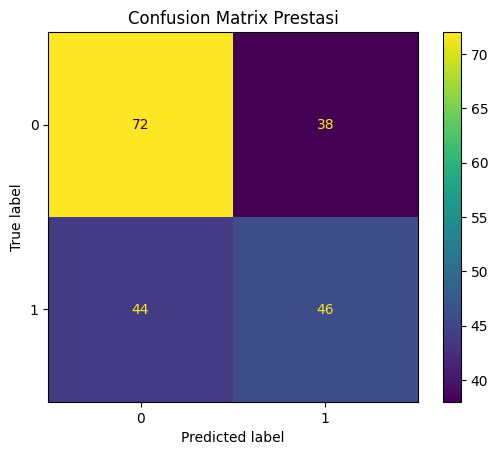

In [26]:
# 🧠 Problem 1: Klasifikasi Prestasi Siswa
X_clf = df.drop(columns=['math score', 'reading score', 'writing score', 'average_score', 'total_score', 'prestasi'])
y_clf = df['prestasi']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)
print("Akurasi Klasifikasi Prestasi:", accuracy_score(y_test_c, y_pred_c))
ConfusionMatrixDisplay.from_estimator(clf, X_test_c, y_test_c)
plt.title("Confusion Matrix Prestasi")
plt.show()

- Model: Random Forest Classifier
- Target: prestasi (1 = berprestasi, 0 = tidak)
- Evaluasi: Akurasi & confusion matrix

In [31]:
# 📊 Problem 2: Prediksi Nilai Matematika
X_math = df.drop(columns=['math score', 'average_score', 'prestasi', 'total_score'])
y_math = df['math score']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_math, y_math, test_size=0.2, random_state=42)
reg_math = RandomForestRegressor(random_state=42)
reg_math.fit(X_train_m, y_train_m)
y_pred_m = reg_math.predict(X_test_m)

print("RMSE Math:", mean_squared_error(y_test_m, y_pred_m) ** 0.5)
print("R2 Math:", r2_score(y_test_m, y_pred_m))

toleransi = 10
akurasi_mendekati = np.mean(np.abs(y_test_m - y_pred_m) <= toleransi)
print("Akurasi (Prediksi Mendekati ±10): {:.2f}%".format(akurasi_mendekati * 100))


RMSE Math: 6.065824068029948
R2 Math: 0.8487940184356789
Akurasi (Prediksi Mendekati ±10): 89.00%


- Model: Random Forest Regressor
- Target: math score
- Evaluasi: RMSE & R^2 Score

**Linear Regression**

In [32]:
X_total = df[label_cols]  # hanya demografi & persiapan tes
y_total = df['total_score']
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_total, y_total, test_size=0.2, random_state=42)
reg_total = LinearRegression()
reg_total.fit(X_train_t, y_train_t)
y_pred_t = reg_total.predict(X_test_t)

print("RMSE Total Score:", mean_squared_error(y_test_t, y_pred_t)**0.5) # Calculate RMSE by taking the square root of MSE
print("R2 Total Score:", r2_score(y_test_t, y_pred_t))

# Hitung MAPE
mape_total = np.mean(np.abs((y_test_t - y_pred_t) / y_test_t)) * 100
print("MAPE Total Score: {:.2f}%".format(mape_total))

# Hitung akurasi prediksi mendekati benar (misalnya toleransi ±15 poin)
toleransi = 15
akurasi_mendekati_total = np.mean(np.abs(y_test_t - y_pred_t) <= toleransi)
print("Akurasi (Prediksi Mendekati ±15): {:.2f}%".format(akurasi_mendekati_total * 100))


RMSE Total Score: 41.0736685602992
R2 Total Score: 0.12556521225697415
MAPE Total Score: 21.43%
Akurasi (Prediksi Mendekati ±15): 28.50%


- Model: Linear Regression
- Target: total_score
- Evaluasi: RMSE & R^2 Score
- Input: hanya faktor demografis dan status persiapan ujian

 untuk menyertakan metrik akurasi tambahan:

In [33]:
# Tambahan Evaluasi: Akurasi dalam toleransi ±15 poin
toleransi = 15
akurasi_mendekati = np.mean(np.abs(y_test_t - y_pred_t) <= toleransi)
print("Akurasi (Toleransi ±15): {:.2f}%".format(akurasi_mendekati * 100))

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test_t - y_pred_t) / y_test_t)) * 100
print("MAPE Total Score: {:.2f}%".format(mape))

Akurasi (Toleransi ±15): 28.50%
MAPE Total Score: 21.43%


### 🧪 Evaluasi Model

Untuk mengevaluasi model pada masing-masing problem, digunakan metrik sebagai berikut:

- **Klasifikasi (Problem 1)**:
  - `Accuracy Score`: untuk mengukur seberapa banyak prediksi benar dibanding total data.
  - `Confusion Matrix`: untuk melihat detail prediksi benar dan salah dari tiap kelas.

- **Regresi (Problem 2 & 3)**:
  - `RMSE (Root Mean Squared Error)`: menyatakan besar rata-rata kesalahan prediksi dalam satuan nilai skor.
  - `R² Score`: menunjukkan proporsi variansi target yang dijelaskan oleh fitur.
  - `MAPE`: presentase kesalahan rata-rata relatif (semakin kecil semakin baik).
  - `Akurasi Toleransi ±15`: mengukur seberapa banyak prediksi berada dalam rentang ±15 poin dari nilai sebenarnya.
